# 1. Install and Import Dependencies

In [1]:
!pip3 install torch torchvision torchaudio

In [2]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 2. Load Model

In [4]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/shaurya/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-9-9 Python-3.10.5 torch-1.12.1 CPU

100%|██████████████████████████████████████| 14.1M/14.1M [00:01<00:00, 9.35MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [5]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make Detections with Images

In [6]:
img = 'https://media.istockphoto.com/photos/group-portrait-of-a-creative-business-team-standing-outdoors-three-picture-id1146473249?b=1&k=20&m=1146473249&s=612x612&w=0&h=-q1guVCuei7X3BFKwWC2bLUOX8BeIaC04pG5s_xfn_c='

In [7]:
results = model(img)
results.print()

image 1/1: 408x612 8 persons
Speed: 266.2ms pre-process, 317.6ms inference, 28.9ms NMS per image at shape (1, 3, 448, 640)


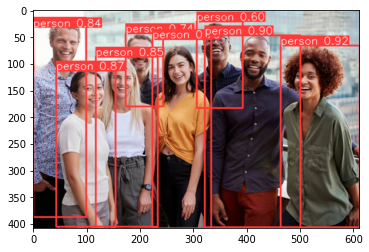

In [8]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [9]:
results.render()

[array([[[235, 235, 233],
         [245, 245, 243],
         [252, 252, 250],
         ...,
         [143, 169, 182],
         [139, 165, 178],
         [137, 163, 176]],
 
        [[235, 235, 233],
         [245, 245, 243],
         [252, 252, 250],
         ...,
         [145, 171, 184],
         [141, 167, 180],
         [140, 166, 179]],
 
        [[235, 235, 233],
         [245, 245, 243],
         [252, 252, 250],
         ...,
         [148, 174, 187],
         [144, 170, 183],
         [142, 168, 181]],
 
        ...,
 
        [[  1,   1,   1],
         [  1,   1,   1],
         [  1,   1,   1],
         ...,
         [255,  56,  56],
         [255,  56,  56],
         [255,  56,  56]],
 
        [[  1,   1,   1],
         [  1,   1,   1],
         [  1,   1,   1],
         ...,
         [255,  56,  56],
         [255,  56,  56],
         [255,  56,  56]],
 
        [[  1,   1,   1],
         [  1,   1,   1],
         [  1,   1,   1],
         ...,
         [255,  56,  56],
  

# 4. Real Time Detections

In [10]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [13]:
import uuid   # Unique identifier
import os
import time

In [15]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [16]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [17]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data/images/awake.342a8014-3007-11ed-9797-7c04d0db87ea.jpg


In [18]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data/images/awake.369c839c-3007-11ed-9797-7c04d0db87ea.jpg
data/images/awake.369c855e-3007-11ed-9797-7c04d0db87ea.jpg
data/images/awake.369c8630-3007-11ed-9797-7c04d0db87ea.jpg
data/images/awake.369c86da-3007-11ed-9797-7c04d0db87ea.jpg
data/images/awake.369c8784-3007-11ed-9797-7c04d0db87ea.jpg
data/images/awake.369c881a-3007-11ed-9797-7c04d0db87ea.jpg
data/images/awake.369c88b0-3007-11ed-9797-7c04d0db87ea.jpg
data/images/awake.369c8950-3007-11ed-9797-7c04d0db87ea.jpg
data/images/awake.369c89e6-3007-11ed-9797-7c04d0db87ea.jpg
data/images/awake.369c8a7c-3007-11ed-9797-7c04d0db87ea.jpg
data/images/awake.369c8b1c-3007-11ed-9797-7c04d0db87ea.jpg
data/images/awake.369c8bb2-3007-11ed-9797-7c04d0db87ea.jpg
data/images/awake.369c8c52-3007-11ed-9797-7c04d0db87ea.jpg
data/images/awake.369c8cf2-3007-11ed-9797-7c04d0db87ea.jpg
data/images/awake.369c8d88-3007-11ed-9797-7c04d0db87ea.jpg
data/images/awake.369c8e1e-3007-11ed-9797-7c04d0db87ea.jpg
data/images/awake.369c8ed2-3007-11ed-9797-7c04d0db87ea.j

In [19]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...
remote: Enumerating objects: 2090, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 2090 (delta 43), reused 69 (delta 34), pack-reused 1986
Receiving objects: 100% (2090/2090), 232.91 MiB | 18.73 MiB/s, done.
Resolving deltas: 100% (1226/1226), done.


In [20]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [21]:
!cd yolov5 && python3 train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-99-g3cd66b1 Python-3.10.5 torch-1.12.1 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, sc

      8/499         0G    0.07138    0.02567    0.05288         13        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38     0.0103          1     0.0645     0.0209

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      9/499         0G    0.07224     0.0293    0.04933         23        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38    0.00912          1     0.0789      0.029

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     10/499         0G    0.07156    0.02584    0.04667         21        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38    0.00856          1       0.13     0.0493

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     11/49

     33/499         0G    0.06408    0.01598    0.03244         18        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.425      0.783      0.543      0.177

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     34/499         0G    0.06766    0.01558    0.03326         18        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.102      0.611       0.11     0.0258

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     35/499         0G    0.07487    0.01448    0.03233         14        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.136          1      0.195     0.0742

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     36/49

     58/499         0G    0.04765    0.01306    0.02898         16        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.342      0.675       0.47      0.219

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     59/499         0G    0.05017    0.01429    0.02974         18        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.355      0.864       0.52      0.273

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     60/499         0G    0.05271    0.01486      0.028         19        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.355      0.864       0.52      0.273

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     61/49

     83/499         0G    0.04213     0.0125    0.02135         17        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.722       0.94      0.849      0.558

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     84/499         0G    0.03874    0.01063    0.01978         12        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.722       0.94      0.849      0.558

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     85/499         0G    0.03272     0.0131    0.02103         17        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.805      0.872      0.895      0.714

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     86/49

    108/499         0G    0.03728    0.01015    0.01151         15        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38       0.78      0.972      0.969      0.714

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    109/499         0G    0.03282   0.008512    0.01496         12        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.816      0.959      0.972      0.797

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    110/499         0G    0.03285    0.01001    0.01309         17        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.557      0.852      0.849      0.554

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    111/49

    133/499         0G    0.02976   0.008823   0.009956         11        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.919          1      0.985      0.801

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    134/499         0G    0.03173    0.01076    0.01203         19        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.743      0.944      0.917      0.652

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    135/499         0G    0.03844   0.009601   0.009511         15        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38        0.9          1      0.982      0.675

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    136/49

    158/499         0G    0.03086   0.009381    0.01128         15        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.659          1      0.934      0.582

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    159/499         0G     0.0349   0.009298    0.01042         19        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.792          1      0.971      0.735

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    160/499         0G    0.03248    0.01078   0.008562         24        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.792          1      0.971      0.735

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    161/49

    183/499         0G    0.03536    0.01012   0.009063         19        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.919      0.997      0.986      0.815

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    184/499         0G    0.02839   0.009734    0.00763         16        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.919      0.997      0.986      0.815

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    185/499         0G    0.02366   0.008164   0.007775         15        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.934          1       0.98       0.82

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    186/49

    208/499         0G    0.02327   0.009853   0.007521         18        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.942          1      0.975      0.775

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    209/499         0G    0.02298   0.009827   0.008632         22        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.942          1       0.98      0.842

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    210/499         0G    0.02227   0.008292   0.008422         19        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.943          1      0.977      0.759

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    211/49

    233/499         0G    0.02013   0.008639     0.0105         19        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.944          1      0.975      0.816

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    234/499         0G    0.02257   0.008425    0.01182         14        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.945          1      0.967      0.756

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    235/499         0G    0.03136   0.007194    0.01189         16        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.869          1      0.932       0.75

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    236/49

    258/499         0G    0.02476   0.007655    0.01445         19        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.945          1      0.982       0.81

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    259/499         0G    0.02855   0.007546   0.005706         17        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.945          1      0.977       0.75

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    260/499         0G    0.02281   0.007636   0.007589         15        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.945          1      0.977       0.75

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    261/49

    283/499         0G    0.02597   0.008433   0.005424         21        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.944          1      0.972      0.797

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    284/499         0G       0.02   0.007509   0.005126         15        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.944          1      0.972      0.797

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    285/499         0G    0.02076   0.006611   0.008213         15        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.944          1      0.975      0.846

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    286/49

    308/499         0G    0.01742   0.007596   0.004553         17        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.944          1       0.98      0.871

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    309/499         0G    0.01566   0.007504   0.006005         17        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.944          1      0.979      0.877

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    310/499         0G    0.01747    0.00686   0.008454         16        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.943          1      0.975      0.854

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    311/49

    333/499         0G    0.01406    0.00738    0.00361         17        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.946          1      0.978      0.885

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    334/499         0G    0.01518   0.006168   0.005354         13        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.946          1      0.978      0.882

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    335/499         0G      0.018   0.007358    0.00629         22        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.946          1       0.98      0.897

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    336/49

    358/499         0G     0.0166   0.006604   0.004738         15        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.942          1       0.98      0.901

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    359/499         0G    0.01958   0.005886   0.004954         10        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.942          1      0.982      0.873

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    360/499         0G    0.01711   0.006591   0.005801         14        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.942          1      0.982      0.873

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    361/49

    383/499         0G    0.01651   0.007225   0.003461         17        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.944          1      0.978      0.884

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    384/499         0G    0.01399   0.006959   0.005646         23        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.944          1      0.978      0.884

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    385/499         0G    0.01451   0.005819   0.005553         17        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.944          1      0.979      0.932

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    386/49

    408/499         0G    0.01346   0.006541   0.003768         14        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.944          1       0.98      0.918

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    409/499         0G    0.01207   0.005556   0.008095         14        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.944          1       0.98      0.933

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    410/499         0G    0.01389   0.006559    0.01197         12        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.944          1       0.98       0.87

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    411/49

    433/499         0G    0.01151   0.007039   0.005863         17        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.945          1      0.982       0.94

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    434/499         0G    0.01063   0.005435   0.006216         13        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.945          1      0.982       0.92

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    435/499         0G    0.01111   0.006024   0.004574         18        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.945          1      0.982       0.94

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    436/49

    458/499         0G    0.00946   0.005805   0.002961         13        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.944          1       0.98      0.949

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    459/499         0G    0.01084   0.005251   0.004071         12        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.944          1       0.98      0.935

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    460/499         0G    0.01028   0.006406    0.00371         16        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.944          1       0.98      0.935

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    461/49

    483/499         0G    0.00911   0.004937   0.003802         14        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.945          1       0.98      0.944

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    484/499         0G   0.009413   0.005139    0.00542         15        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.945          1       0.98      0.944

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    485/499         0G   0.009118   0.005175   0.003897         16        320: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         40         38      0.945          1      0.982      0.946

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    486/49

# 6. Load Custom Model

In [14]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/Users/shaurya/Desktop/Drowsee/yolov5/runs/train/exp/weights/last.pt', force_reload = True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/shaurya/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-9-25 Python-3.10.5 torch-1.12.1 CPU

Fusing layers... 
Model summary: 213 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [15]:
img = os.path.join('data', 'images', 'drowsy.c163a358-3006-11ed-9797-7c04d0db87ea.jpg')

In [16]:
results = model(img)

In [17]:
results.print()

image 1/1: 720x1280 1 drowsy
Speed: 39.0ms pre-process, 238.6ms inference, 1.1ms NMS per image at shape (1, 3, 384, 640)


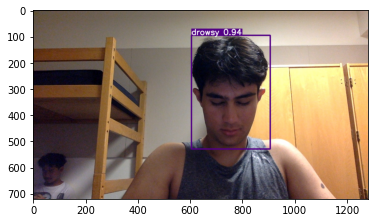

In [18]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()